In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import skimage.io
import os
from PIL import Image
from os import listdir
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir_train= '/content/drive/MyDrive/Green_Channel_Images'

In [ ]:
images_train=os.listdir(base_dir_train)
type(images_train)
len(images_train)

3662

In [ ]:
import os
# Get a list of all files in the directory
file_list = os.listdir(base_dir_train)

# Filter the list to include only image files (extensions: .png, .jpg, .jpeg, .gif, .bmp)
image_extensions = ['.png', '.jpg', '.jpeg', '.gif', '.bmp']
image_files_train = [os.path.join(base_dir_train, file_name) for file_name in file_list if any(file_name.lower().endswith(ext) for ext in image_extensions)]

# Now 'image_files' is a list containing the file paths of all image files in the directory
print(image_files_train)


['/content/drive/MyDrive/Green_Channel_Images/6f0e5848d9ce.png', '/content/drive/MyDrive/Green_Channel_Images/6f3b62e5b7f5.png', '/content/drive/MyDrive/Green_Channel_Images/6f460f9968c7.png', '/content/drive/MyDrive/Green_Channel_Images/6f689fced922.png', '/content/drive/MyDrive/Green_Channel_Images/6fbaaf8eb67a.png', '/content/drive/MyDrive/Green_Channel_Images/026dcd9af143.png', '/content/drive/MyDrive/Green_Channel_Images/6fe4751a3b42.png', '/content/drive/MyDrive/Green_Channel_Images/709784f7fcc2.png', '/content/drive/MyDrive/Green_Channel_Images/7131bf4c9e6f.png', '/content/drive/MyDrive/Green_Channel_Images/7179f85bfd6f.png', '/content/drive/MyDrive/Green_Channel_Images/7116128c65ab.png', '/content/drive/MyDrive/Green_Channel_Images/70d657f8f503.png', '/content/drive/MyDrive/Green_Channel_Images/70f5caf5f305.png', '/content/drive/MyDrive/Green_Channel_Images/71e43b4f8ba6.png', '/content/drive/MyDrive/Green_Channel_Images/721214151233.png', '/content/drive/MyDrive/Green_Channel_I

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import csv
from skimage import feature, io, color

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os

# Function to extract LBP features from an image
def extract_lbp_features(image):
    if len(image.shape) > 2:  # Check if the image is not grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    radius = 1
    n_points = 8 * radius
    method = 'uniform'
    lbp_image = feature.local_binary_pattern(image, n_points, radius, method)
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

# List of image paths
image_paths = image_files_test_sample  # Add your image paths

# Initialize lists to store image names and features
image_names = []
lbp_features_list = []

# Extract LBP features for each image in the list
for image_path in image_paths:
    img = cv2.imread(image_path)
    features = extract_lbp_features(img)
    lbp_features_list.append(features)

    # Extract and store only the image filenames (without the path and extension)
    image_name = os.path.splitext(os.path.basename(image_path))[0]  # Remove extension
    image_names.append(image_name)

# Convert the lists of names and features to a DataFrame
data = np.array(lbp_features_list)
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(data.shape[1])])
df.insert(0, 'Image_Name', image_names)

# Save the DataFrame to a CSV file
df.to_csv('lbp_features_with_names_test1.csv', index=False)


In [ ]:
df_train = pd.read_csv('/content/lbp_features_with_names_train1.csv')

In [ ]:
df_csv = pd.read_csv('/content/train.csv')

In [ ]:
merged_df = pd.merge(df_train, df_csv, left_on='Image_Name', right_on='id_code', how='inner')
print(merged_df)

        Image_Name  Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  \
0     6f0e5848d9ce   0.021934   0.057826   0.033675   0.111654   0.128203   
1     6f3b62e5b7f5   0.017309   0.049928   0.020021   0.098436   0.106609   
2     6f460f9968c7   0.020024   0.054240   0.030752   0.110105   0.127963   
3     6f689fced922   0.021431   0.055790   0.033449   0.112061   0.133480   
4     6fbaaf8eb67a   0.012111   0.041926   0.009221   0.091913   0.081928   
...            ...        ...        ...        ...        ...        ...   
3657  61ac9b0dc6b9   0.006274   0.032726   0.009311   0.093933   0.060217   
3658  61bbc11fe503   0.007870   0.037745   0.011549   0.103467   0.076549   
3659  61bbe8db6f3a   0.010912   0.046885   0.016492   0.107270   0.089998   
3660  61c2fbd16e38   0.056517   0.077024   0.037005   0.087090   0.079289   
3661  61d9c88a3a4b   0.019625   0.043667   0.023609   0.055418   0.058638   

      Feature_5  Feature_6  Feature_7  Feature_8  Feature_9       id_code  

In [ ]:
merged_df = merged_df.drop('id_code', axis =1)

In [ ]:
merged_df

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,diagnosis
0,6f0e5848d9ce,0.021934,0.057826,0.033675,0.111654,0.128203,0.172271,0.089629,0.068385,0.229638,0.086785,0
1,6f3b62e5b7f5,0.017309,0.049928,0.020021,0.098436,0.106609,0.150901,0.086608,0.068229,0.309005,0.092955,0
2,6f460f9968c7,0.020024,0.054240,0.030752,0.110105,0.127963,0.173393,0.087400,0.065958,0.249022,0.081142,0
3,6f689fced922,0.021431,0.055790,0.033449,0.112061,0.133480,0.168190,0.088069,0.065434,0.238574,0.083521,0
4,6fbaaf8eb67a,0.012111,0.041926,0.009221,0.091913,0.081928,0.171425,0.068716,0.079429,0.368824,0.074507,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3657,61ac9b0dc6b9,0.006274,0.032726,0.009311,0.093933,0.060217,0.203708,0.066705,0.066038,0.411108,0.049979,2
3658,61bbc11fe503,0.007870,0.037745,0.011549,0.103467,0.076549,0.212914,0.078297,0.072973,0.339962,0.058673,4
3659,61bbe8db6f3a,0.010912,0.046885,0.016492,0.107270,0.089998,0.204013,0.088733,0.072760,0.291967,0.070971,1
3660,61c2fbd16e38,0.056517,0.077024,0.037005,0.087090,0.079289,0.108736,0.081732,0.110587,0.177893,0.184128,2


In [ ]:
merged_df['diagnosis'] = merged_df['diagnosis'].apply(lambda x: 1 if x != 0 else x)

In [ ]:
merged_df['diagnosis']

0       0
1       0
2       0
3       0
4       0
       ..
3657    1
3658    1
3659    1
3660    1
3661    0
Name: diagnosis, Length: 3662, dtype: int64

In [ ]:
merged_df

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,diagnosis
0,6f0e5848d9ce,0.021934,0.057826,0.033675,0.111654,0.128203,0.172271,0.089629,0.068385,0.229638,0.086785,0
1,6f3b62e5b7f5,0.017309,0.049928,0.020021,0.098436,0.106609,0.150901,0.086608,0.068229,0.309005,0.092955,0
2,6f460f9968c7,0.020024,0.054240,0.030752,0.110105,0.127963,0.173393,0.087400,0.065958,0.249022,0.081142,0
3,6f689fced922,0.021431,0.055790,0.033449,0.112061,0.133480,0.168190,0.088069,0.065434,0.238574,0.083521,0
4,6fbaaf8eb67a,0.012111,0.041926,0.009221,0.091913,0.081928,0.171425,0.068716,0.079429,0.368824,0.074507,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3657,61ac9b0dc6b9,0.006274,0.032726,0.009311,0.093933,0.060217,0.203708,0.066705,0.066038,0.411108,0.049979,1
3658,61bbc11fe503,0.007870,0.037745,0.011549,0.103467,0.076549,0.212914,0.078297,0.072973,0.339962,0.058673,1
3659,61bbe8db6f3a,0.010912,0.046885,0.016492,0.107270,0.089998,0.204013,0.088733,0.072760,0.291967,0.070971,1
3660,61c2fbd16e38,0.056517,0.077024,0.037005,0.087090,0.079289,0.108736,0.081732,0.110587,0.177893,0.184128,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Assuming 'df' contains your dataset and the target variable is 'diagnosis'

# Separate features and target variable
X = merged_df.drop(['Image_Name', 'diagnosis'], axis=1)  # Features
y = merged_df['diagnosis']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # weighted average for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.8868
Precision: 0.8872
Recall: 0.8868


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming 'df' contains your dataset and the target variable is 'diagnosis'

# Separate features and target variable
X = merged_df.drop(['Image_Name', 'diagnosis'], axis=1)  # Features
y = merged_df['diagnosis']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # weighted average for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.9277
Precision: 0.9277
Recall: 0.9277


In [ ]:
from sklearn.svm import SVC

# Assuming 'df' contains your dataset and the target variable is 'diagnosis'

# Separate features and target variable
X = merged_df.drop(['Image_Name', 'diagnosis'], axis=1)  # Features
y = merged_df['diagnosis']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # weighted average for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.8772
Precision: 0.8801
Recall: 0.8772


In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, ord =1,axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.898197706171491
Average Recall: 0.0049056286902095115


In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.8955488803932278
Average Recall: 0.0048910511921107895


In [ ]:
def calculate_distances_with_names_jaccard(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    # Convert binary values based on a threshold (e.g., >0.5 as 1, else 0)
    query_features_bin = (query_features > 0.5).astype(int)
    database_features_bin = (database_features > 0.5).astype(int)

    # Compute Jaccard similarity
    intersection = np.sum(np.minimum(query_features_bin, database_features_bin), axis=1)
    union = np.sum(np.maximum(query_features_bin, database_features_bin), axis=1)

    # Avoid division by zero, replace the division by zero with NaN
    with np.errstate(divide='ignore', invalid='ignore'):  # Ignore division by zero errors
        jaccard_sim = np.divide(intersection, union, out=np.zeros_like(union, dtype=float), where=union != 0)
        distances = 1 - jaccard_sim  # Convert similarity to distance

    image_names = image_database['Image_Name'].values
    return distances, image_names



# Use calculate_distances_with_names_jaccard in your loop for Jaccard similarity

def retrieve_similar_images_jaccard(query_image, image_database):
    distances, image_names = calculate_distances_with_names_jaccard(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

    # Retrieving similar images
    similar_images_indices = retrieve_similar_images_jaccard(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

    # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images / 10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)

# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.5216275259421083
Average Recall: 0.0028743725865242598


In [ ]:
def calculate_distances_with_names_cosine(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    # Calculate dot product between query and database vectors
    dot_product = np.dot(database_features, query_features)

    # Calculate magnitudes of the vectors
    query_magnitude = np.linalg.norm(query_features)
    database_magnitudes = np.linalg.norm(database_features, axis=1)

    # Calculate cosine similarity
    cosine_sim = dot_product / (query_magnitude * database_magnitudes)

    # Convert similarity to distance
    distances = 1 - cosine_sim

    image_names = image_database['Image_Name'].values
    return distances, image_names

# Use calculate_distances_with_names_cosine in your loop for Cosine Similarity

def retrieve_similar_images_cosine(query_image, image_database):
    distances, image_names = calculate_distances_with_names_cosine(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

    # Retrieving similar images
    similar_images_indices = retrieve_similar_images_cosine(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

    # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images / 10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)

# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.8959311851447296
Average Recall: 0.004893122623689413


In [ ]:
recall_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.000554016620498615,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002770083102493075,
 0.0,
 0.005385029617662897,
 0.005385029617662897,
 0.005385029617662897,
 0.005385029617662897,
 0.005385029617662897,
 0.004308023694130318,
 0.004846526655896607,
 0.005385029617662897,
 0.0016155088852988692,
 0.005385029617662897,
 0.005385029617662897]

In [ ]:
precision_list

[0.8,
 0.9,
 0.6,
 1.0,
 0.8,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2,
 0.2,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 0.9,
 0.9,
 0.8,
 1.0,
 0.9,
 0.8,
 1.0,
 1.0,
 0.9,
 0.8,
 1.0,
 1.0,
 0.9,
 0.8,
 0.9,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 0.1,
 0.8,
 0.1,
 1.0,
 0.8,
 0.9,
 1.0,
 0.8,
 0.9,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6,
 0.9,
 0.1,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 0.9,
 1.0,
 1.0,
 0.2,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 0.3,
 0.2,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 0.9,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 1.0,
 0.3,
 0.2,
 0.7,
 1.0,
 1.0,
 0.2,
 1.0,
 0.9,
 1.0,
 1.0,
 0.8,
 0.8,
 0.4,
 0.8,
 0.9,
 0.8,
 0.8,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 0.3,
 1.0,
 0.9,
 0.8,
 1.0,
 1.0,
 1.0,
 0.9,
 0.9,
 1.0,
 0.2,
 0.8,
 0.9,
 0.9,
 0.7,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 0.9,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 0.9,
 1.0,
 0.5,
 0.8,
 1.0

In [ ]:
# Assuming 'df' is your DataFrame
rows_with_diagnosis_0 = merged_df[merged_df['diagnosis'] == 0]
rows_with_diagnosis_1 = merged_df[merged_df['diagnosis'] == 1]


In [ ]:
rows_with_diagnosis_0

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,diagnosis
0,6f0e5848d9ce,0.021934,0.057826,0.033675,0.111654,0.128203,0.172271,0.089629,0.068385,0.229638,0.086785,0
1,6f3b62e5b7f5,0.017309,0.049928,0.020021,0.098436,0.106609,0.150901,0.086608,0.068229,0.309005,0.092955,0
2,6f460f9968c7,0.020024,0.054240,0.030752,0.110105,0.127963,0.173393,0.087400,0.065958,0.249022,0.081142,0
3,6f689fced922,0.021431,0.055790,0.033449,0.112061,0.133480,0.168190,0.088069,0.065434,0.238574,0.083521,0
4,6fbaaf8eb67a,0.012111,0.041926,0.009221,0.091913,0.081928,0.171425,0.068716,0.079429,0.368824,0.074507,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3646,60aa4e649abf,0.052247,0.071237,0.041353,0.095929,0.102438,0.122377,0.082984,0.104370,0.161732,0.165332,0
3648,60edda7b4871,0.023273,0.048285,0.024964,0.050577,0.049884,0.057778,0.049540,0.047283,0.574291,0.074125,0
3651,6107a2e9f60e,0.092311,0.092144,0.052824,0.072792,0.077728,0.080958,0.073917,0.101317,0.152939,0.203069,0
3656,61a62b1dcc36,0.024276,0.049200,0.025953,0.049756,0.049536,0.056364,0.049149,0.047722,0.573767,0.074276,0


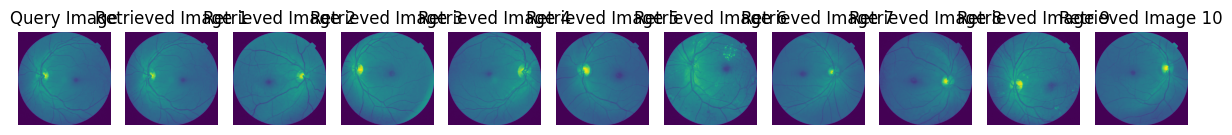

In [ ]:
import matplotlib.pyplot as plt
def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)
    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names
# Function to display images in a square grid
# Function to display images in a square grid with labels
def display_images_square(query_image_path, retrieved_image_paths):
    num_images = len(retrieved_image_paths) + 1
    rows = math.ceil(math.sqrt(num_images))
    cols = math.ceil(num_images / rows)

    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    # Display query image in the first row
    query_img = plt.imread(query_image_path)
    axes[0, 0].imshow(query_img)
    axes[0, 0].set_title('Query Image')
    axes[0, 0].axis('off')

    # Display retrieved images in subsequent rows
    for i, image_path in enumerate(retrieved_image_paths):
        retrieved_img = plt.imread(image_path)
        row = (i + 1) // cols
        col = (i + 1) % cols
        axes[row, col].imshow(retrieved_img)
        axes[row, col].set_title(f'Image {i}')
        axes[row, col].axis('off')

    for i in range(num_images, rows * cols):
        axes[i // cols, i % cols].axis('off')

    plt.tight_layout()
    plt.show()



# Function to retrieve similar images with paths
def retrieve_similar_images_with_paths(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]  # Get top 10 similar images
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_paths = [f"/content/drive/MyDrive/Green_Channel_Images/{image_database.iloc[idx]['Image_Name']}.png" for idx in sorted_indices]
    return similar_images_paths

# Loop through your query images
for i in range(1):  # Loop through all query images
    query_image = rows_with_diagnosis_0.iloc[i]  # Access your query images
    image_database = merged_df  # Your main dataset containing images

    # Retrieve similar images with their paths
    retrieved_image_paths = retrieve_similar_images_with_paths(query_image, image_database)
    query_image_path = '/content/drive/MyDrive/Green_Channel_Images/6f0e5848d9ce.png'
    # Display retrieved images
    display_images_with_titles(query_image_path,retrieved_image_paths)


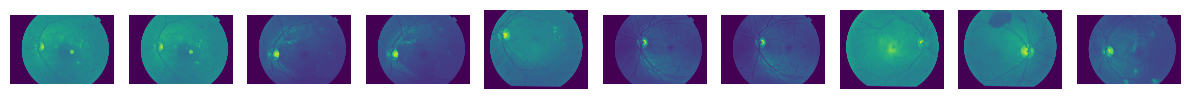

In [ ]:
import matplotlib.pyplot as plt
def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
       'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)
    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names
# Function to display images
def display_images(image_paths):
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(12, 6))  # Adjust figure size as needed

    for i, image_path in enumerate(image_paths):
        img = plt.imread(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')  # Hide axis labels

    plt.tight_layout()
    plt.show()

# Function to retrieve similar images with paths
def retrieve_similar_images_with_paths(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]  # Get top 10 similar images
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_paths = [f"/content/drive/MyDrive/Green_Channel_Images/{image_database.iloc[idx]['Image_Name']}.png" for idx in sorted_indices]
    return similar_images_paths

# Loop through your query images
for i in range(1):  # Loop through all query images
    query_image = rows_with_diagnosis_1.iloc[i]  # Access your query images
    image_database = merged_df  # Your main dataset containing images

    # Retrieve similar images with their paths
    retrieved_image_paths = retrieve_similar_images_with_paths(query_image, image_database)

    # Display retrieved images
    display_images(retrieved_image_paths)


In [ ]:
rows_with_diagnosis_0


,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,diagnosis
0,6f0e5848d9ce,0.021934,0.057826,0.033675,0.111654,0.128203,0.172271,0.089629,0.068385,0.229638,0.086785,0
1,6f3b62e5b7f5,0.017309,0.049928,0.020021,0.098436,0.106609,0.150901,0.086608,0.068229,0.309005,0.092955,0
2,6f460f9968c7,0.020024,0.054240,0.030752,0.110105,0.127963,0.173393,0.087400,0.065958,0.249022,0.081142,0
3,6f689fced922,0.021431,0.055790,0.033449,0.112061,0.133480,0.168190,0.088069,0.065434,0.238574,0.083521,0
4,6fbaaf8eb67a,0.012111,0.041926,0.009221,0.091913,0.081928,0.171425,0.068716,0.079429,0.368824,0.074507,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3646,60aa4e649abf,0.052247,0.071237,0.041353,0.095929,0.102438,0.122377,0.082984,0.104370,0.161732,0.165332,0
3648,60edda7b4871,0.023273,0.048285,0.024964,0.050577,0.049884,0.057778,0.049540,0.047283,0.574291,0.074125,0
3651,6107a2e9f60e,0.092311,0.092144,0.052824,0.072792,0.077728,0.080958,0.073917,0.101317,0.152939,0.203069,0
3656,61a62b1dcc36,0.024276,0.049200,0.025953,0.049756,0.049536,0.056364,0.049149,0.047722,0.573767,0.074276,0


In [ ]:
rows_with_diagnosis_1

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,diagnosis
5,026dcd9af143,0.037126,0.080496,0.027454,0.084403,0.055585,0.098750,0.080516,0.074808,0.311828,0.149034,1
7,709784f7fcc2,0.004751,0.025895,0.008807,0.097291,0.092252,0.193477,0.062300,0.058020,0.418151,0.039056,1
10,7116128c65ab,0.003447,0.021211,0.004938,0.087381,0.054949,0.192044,0.052253,0.061441,0.489905,0.032430,1
11,70d657f8f503,0.017855,0.052122,0.029186,0.113471,0.128263,0.184941,0.088793,0.067239,0.240533,0.077597,1
12,70f5caf5f305,0.022768,0.057061,0.035616,0.110782,0.136824,0.159087,0.085994,0.063780,0.244468,0.083619,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3655,6181aa9f75f4,0.028176,0.079371,0.026214,0.109171,0.092536,0.160155,0.094408,0.094555,0.183896,0.131519,1
3657,61ac9b0dc6b9,0.006274,0.032726,0.009311,0.093933,0.060217,0.203708,0.066705,0.066038,0.411108,0.049979,1
3658,61bbc11fe503,0.007870,0.037745,0.011549,0.103467,0.076549,0.212914,0.078297,0.072973,0.339962,0.058673,1
3659,61bbe8db6f3a,0.010912,0.046885,0.016492,0.107270,0.089998,0.204013,0.088733,0.072760,0.291967,0.070971,1


In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(1857):  # Loop through all query images
    query_image = rows_with_diagnosis_1.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.89536887452881
Average Recall: 0.004821587908071136


In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(1805):  # Loop through all query images
    query_image = rows_with_diagnosis_0.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.8957340720221608
Average Recall: 0.004962515634471806


In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.8955488803932278
Average Recall: 0.0048910511921107895


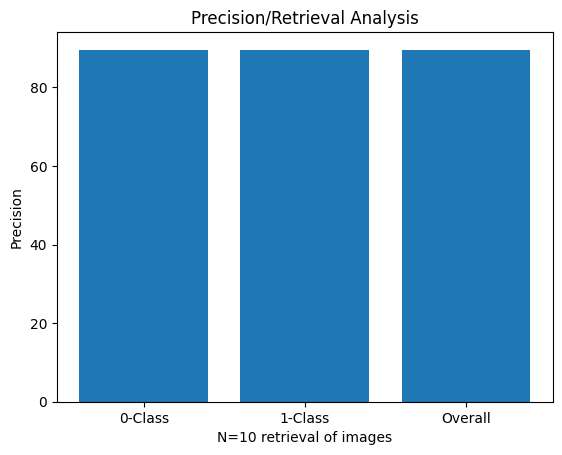

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['0-Class', '1-Class', 'Overall']
values = [89.57 ,89.53, 89.55]

# Creating the bar chart
plt.bar(categories, values)

# Adding labels and title
plt.ylabel('Precision')
plt.xlabel('N=10 retrieval of images')
plt.title('Precision/Retrieval Analysis')

# Display the chart
plt.show()


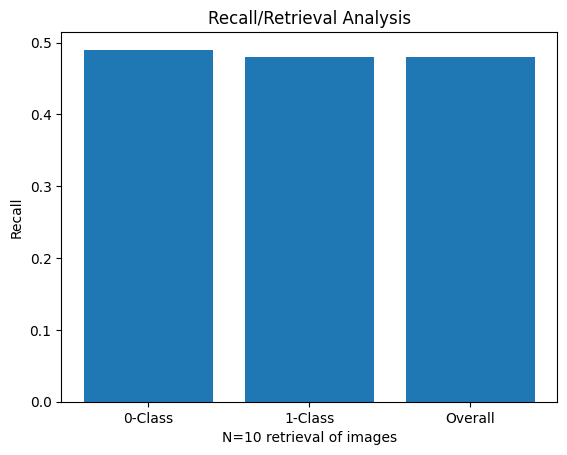

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['0-Class', '1-Class', 'Overall']
values = [0.49 ,0.48, 0.48]

# Creating the bar chart
plt.bar(categories, values)

# Adding labels and title
plt.ylabel('Recall')
plt.xlabel('N=10 retrieval of images')
plt.title('Recall/Retrieval Analysis')

# Display the chart
plt.show()


In [ ]:
def retrieve_similar_images(query_image, image_database, count):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:count]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices


In [ ]:
# Your existing code...

# Define a list of retrieval image counts to loop through
retrieval_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Loop through different retrieval counts
for count in retrieval_counts:
    precision_list = []
    recall_list = []

    for i in range(3662):  # Loop through all query images
        query_image = merged_df.iloc[i]
        image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
        similar_images_indices = retrieve_similar_images(query_image, image_database, count)

        # Extracting classes of query image and retrieved images
        query_class = query_image['diagnosis']
        retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
        relevant_images = np.count_nonzero(retrieved_classes == query_class)
        precision = relevant_images / count  # Use the current retrieval count
        recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

        precision_list.append(precision)
        recall_list.append(recall)

    # Computing average precision and recall for the current retrieval count
    average_precision = np.mean(precision_list)
    average_recall = np.mean(recall_list)

    print(f"Retrieval Count: {count}")
    print("Average Precision:", average_precision)
    print("Average Recall:", average_recall)
    print("\n")


Retrieval Count: 10
Average Precision: 0.8955488803932278
Average Recall: 0.0048910511921107895


Retrieval Count: 20
Average Precision: 0.8863189513926816
Average Recall: 0.009681136510773325


Retrieval Count: 30
Average Precision: 0.8816766794101585
Average Recall: 0.014445238422609759


Retrieval Count: 40
Average Precision: 0.8784339158929546
Average Recall: 0.019189289258040167


Retrieval Count: 50
Average Precision: 0.8754341889677772
Average Recall: 0.02390481933367837


Retrieval Count: 60
Average Precision: 0.8729018751137811
Average Recall: 0.028603102008138537


Retrieval Count: 70
Average Precision: 0.8706951704767106
Average Recall: 0.033286326109872755


Retrieval Count: 80
Average Precision: 0.8688455761878754
Average Recall: 0.03796105388784769


Retrieval Count: 90
Average Precision: 0.866945809818557
Average Recall: 0.04261351031391862


Retrieval Count: 100
Average Precision: 0.8649262697979246
Average Recall: 0.047238971569269185




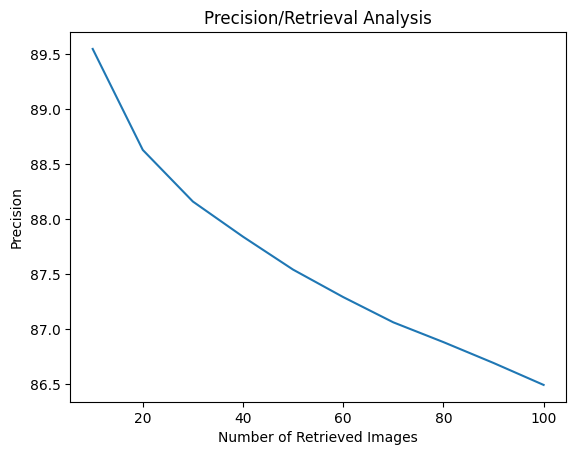

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # X-axis values
y_values = [89.55,88.63,88.16,87.84,87.54,87.29, 87.06, 86.88, 86.69, 86.49]  # Y-axis values

# Plotting the line graph
plt.plot(x_values, y_values)

# Adding labels and title
plt.ylabel('Precision')
plt.xlabel('Number of Retrieved Images')
plt.title('Precision/Retrieval Analysis')

# Display the plot
plt.show()


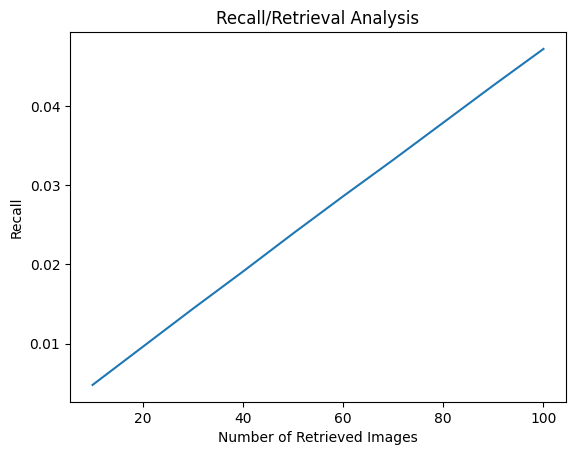

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # X-axis values
y_values = [0.0048, 0.0096, 0.0144, 0.0191, 0.0239, 0.0286, 0.0332, 0.0379, 0.0426, 0.0472]  # Y-axis values

# Plotting the line graph
plt.plot(x_values, y_values)

# Adding labels and title
plt.ylabel('Recall')
plt.xlabel('Number of Retrieved Images')
plt.title('Recall/Retrieval Analysis')

# Display the plot
plt.show()
